In [29]:
from IPython.display import display, HTML # type:ignore
style = "<style> body { font-family: Oswald; font-size: 16px; } </style>"
display(HTML(style))

# <div style="font-family:fantasy;">Dimensionality Reduction</div>
*dimred=dimensional reduction*
A lot of features make the training slow and also do not lead to a good result. This is called curse of dimensionality. There can be ways to reduce the number of features like merging the closely correlated features byb their means and so on. By doing this we will not be loosing many informations. Reducing dimensionality does cause some information loss so even though it will speed up the training, it may make your system perform worse. Thus we should first try to train model on the original dataset before going for dimred. But dimred is useful for data vizualization when we just need 2 or 3 features which makes it possible to plot a propper graph for it.

### <div style="font-family:fantasy;">Curse of Dimensionality</div>
There is plenty of space in the high dimension. As a result high dimension dataset areat risk of being sparse: Most training instances are likely to be far away from each other. This also means that a new training instance will be far away from training instance, making predictions much less reliable than in lower dimension, since they will be based on much larger extrapolation. Thus there will be more risk of overfitting.

# <div style="font-family:fantasy;">Main approaches of Dimensionality Reduction</div>
### <div style="font-family:fantasy;">Projection</div>
In real world training instances are not uniformly spread accross all domains. Many features are almost costant, while others are highly correlated. As a result all the training instances lie within much lower dimensional subspace of a high dimensional space. This projection is similar to projection of vectors like a three dimension dataset where the instances can be made to fall onto a plane can be converted to 2D. Also in linear regression the 2D dataset can be made to 1D considering all the points falling in the regressor line. But obviously this is not the best apporach for dimensionality reduction. A swiss roll toy data cannot be made into that as it will lead to intermixing of discrete data points leading to loss of diversity.

In [2]:
#generate a 3d dataset

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

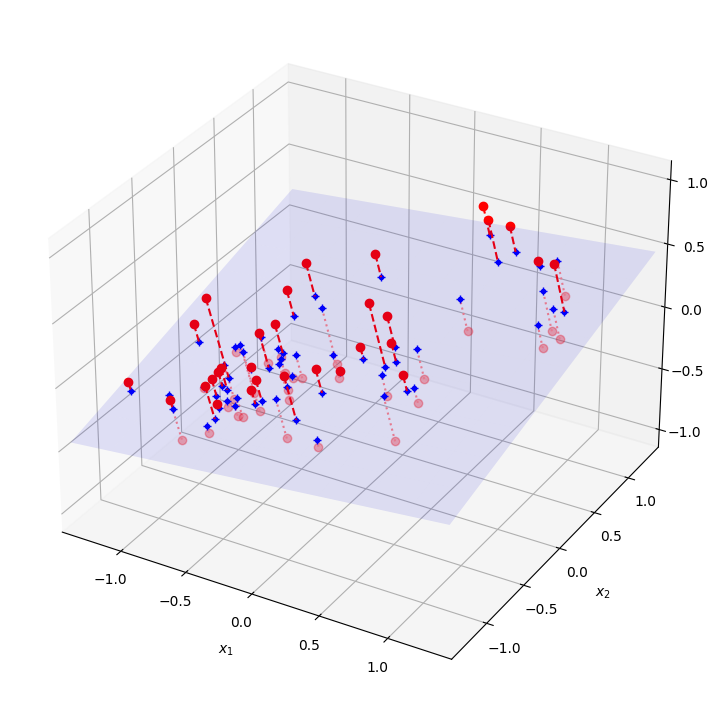

In [3]:
#plotting it 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# plot samples and projection lines below plane first
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

plt.show()

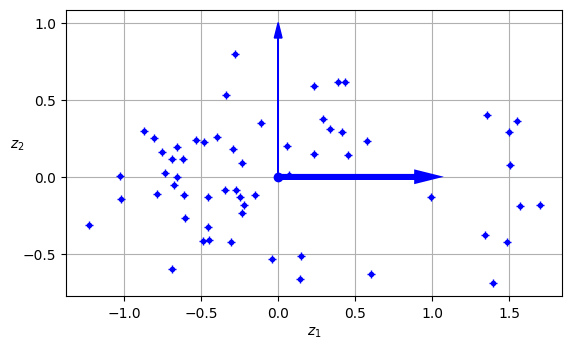

In [4]:
# extra code – this cell generates and saves Figure 8–3

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)


the above figures show the projection of 3D dataset to 2D. Now the below diagram show the case where this will not be applicable i.e. the swiss roll dataset.

In [5]:
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

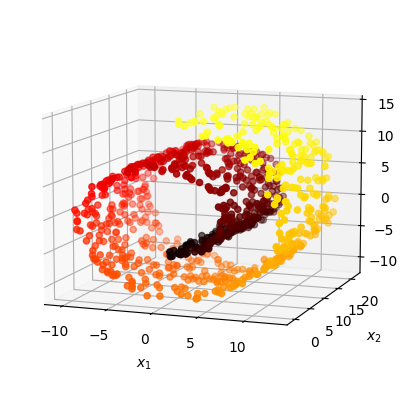

In [6]:
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256))) # type: ignore

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)
plt.show()

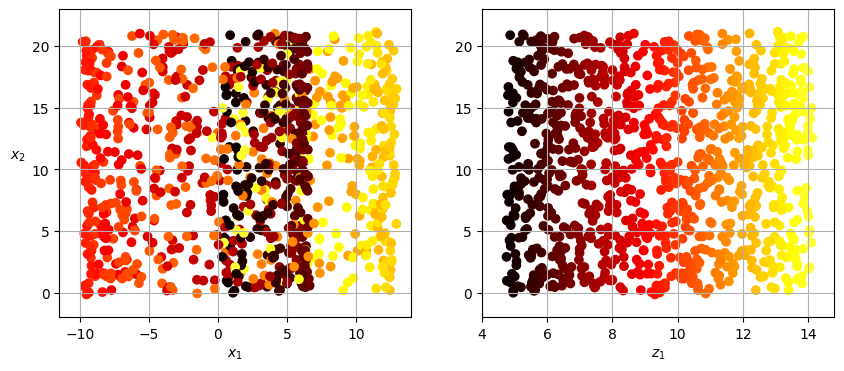

In [7]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)


from the above left figure we can observe that the information in the dataset is lost on converting it to 3D. But there is a solution which is called manifold learning. Here we unroll the swiss roll and then it can be said to be a 2d plane without the loss of information and also the state can be retriven by folding the plane.


### <div style="font-family:fantasy;">Manifold Learning</div>
The d-D manifold is a part of n-D space where $d<n$ that locally resembles a d-D hyperplane. Where d-D manifold can be bent and twisted to fomr the n-D set in n-D space. Thus d-D is a manifold and the procedure of converting from n-D to d-D via bend and twist etc. is maifold learning. Most real world high dimensional dataset lie close to much lower dimensional manifold. For MNIST dataset iteslf the degrees of freedom if we try to create a digit image are dramatically lower degree of freedom if we were allowed to generate any image we wanted these constraint tend to squeeze dataset into lower dimensional manifold.
# <div style="font-family:fantasy;">PCA-Principal Component Analysis</div>
It first identifies hyperplane lying closet to the data then projects the data onto it. 
### <div style="font-family:fantasy;">Preserving variance</div>
* choose the correct hyperplane. 
* Always select the axis that preserves maximum variance.
for example, in a dataset the linear regressor line will preserve the maximum variance and the line $\perp$ to the regressor line will preserve the least(only in this case of 2D). Thus choose the former. Another way to justify this choice is, the axis that minimizes the mean squared distance b/w original dataset and its projection on the axis.
### <div style="font-family:fantasy;">Principal Component</div>
PCA identifies line with max variance in the training set. It also finds other axis orthogonal to each other and the first one. They are alled principal components. In two dimension there is just one more such axis $\perp$ to the regressor line. These lines acount for largest amount of remaining variance. The PC lines are represented by the vectors $\vec{c_1}, \vec{c_2},\vec{c_3} ... \vec{c_n}$ where $n$ is the number of dimension in the dataset. $i^{th}$ axis is the $i^{th}$ PC and $\vec{c_i}$ is the vector in the direction of it(unit vector).\
Sometime in higher dimension the axis are just oposite to one another and hence the unit vectors arezero centered. Hence the direction of unit vectors returned by PCA are not stable. Also the unit vectors might rotate or swap if the variance in those two axis are same.
### <div style="font-family:fantasy;">Finding PC</div>
The techinque is singular value decomposition we can decompose training set matrix $\vec{X}$ into multiplication of three matrices $\vec{U},\vec{\Sigma}, \vec{V}^T$ where $\vec{V}$ contains the unit vectors that define all PCs.
$$
\begin{bmatrix}
| & | & ... & |\\
\vec{c_1} & \vec{c_2} & ... & \vec{c_n}\\
| & | & ... & |\\
\end{bmatrix}
$$
in numpy ```svd()``` method can return that.



In [8]:
#generate a 3d dataset

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

In [9]:
X_centered = X-X.mean(axis=0)
u,s,vt = np.linalg.svd(X_centered) #note that it returns V-transpose not V
vt

array([[ 0.67857588,  0.70073508,  0.22023881],
       [-0.72817329,  0.6811147 ,  0.07646185],
       [-0.09642839, -0.21225719,  0.97244458]])

In [10]:
c1 = vt.T[:,0]
c2 = vt.T[:,1]
print(c1,c2)

[0.67857588 0.70073508 0.22023881] [-0.72817329  0.6811147   0.07646185]


### <div style="font-family:fantasy;">Projecting Down to d dimensions</div>
As we know projection means dot product so we take the do of training set matrix $\vec{X}$ and another matrix $\vec{W_d}$ which is the direction cosine for the first d dimensions or it contains the first d unit vectors from $\vec{V}$ now we choose the first d because they preserve large part of the dataset variance.\
now $\vec{X_d} = \vec{X}\cdot \vec{W_d}$
### <div style="font-family:fantasy;">using sklearn</div>
It uses svd decomposition to implement PCA.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

### <div style="font-family:fantasy;">Explained variance ratio</div>
This ratio indicates the proportion of dataset's variance that lies along each principal component.

In [12]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

note that there are two columns as have reduced the dimension to only two

### <div style="font-family:fantasy;">Choosing right number of dimension</div>
choosing right number of dimension. It is ideal to choose number of dimension d so that it adds up to large proportion of variance. Unless we want it for *datviz* where we just need 2 to 3 dimensions. The following code generates dimension that preserve 95% of training instance.


In [13]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_) 
#cumulative sum of the variance ratio so that we can cutoff the matrix X whenever this cumulative variance exceeds 0.95 
d = np.argmax(cumsum>=0.95)+1
d

3

Also instead of passing the dim in pca we can pass the ratio of variance to conserve it will automatically set the correct dim

In [14]:
pca = PCA(n_components=0.85)
pca.fit(X)
len(pca.explained_variance_ratio_)

2

in the above code we get 2 as we set the n_components for 85%.\
Also we can plot the exaplained variance ratio as a function of dimension(i.e. cumsum) there will be an elbow after which the curve will not be increasing at a faster rate that point on x-axis gives the correct dimension. To represent this we need a higher dimension dataset thus we use mnist

In [15]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # d equals 154

/home/icode100/pyenv/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [16]:
d

154

we can know the dimension in of PCA using ```pca.n_components_```

In [17]:
pca.n_components_

784

In [18]:
pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [19]:
pca.n_components_

154

now we do the same using graph plotting

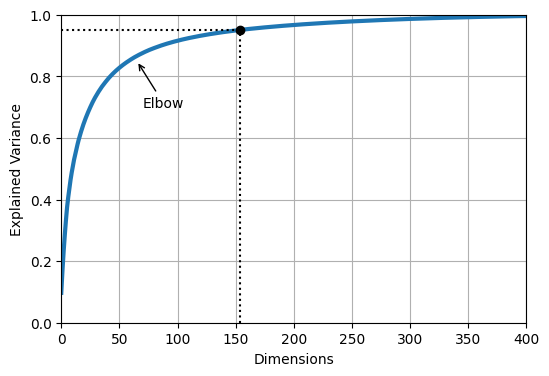

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

### <div style="font-family:fantasy;">PCA for compression</div>
after applying PCA to training set its size reduces by considerable amount, thus makingit fast for applying any classification algortihm. It is possible to decompress the reduced dataset to original dimension by aaplying inverse transformation of PCA projection.\
But this will not give back the original data as some information were lost (example while returning 95% varianec 5% is lost and cannot be rettiven back).\
MSE b/w reconstructed and original data is reconstruction error.

In [21]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)

In [22]:
X_reduced.shape

(60000, 154)

In [23]:
X_recovered = pca.inverse_transform(X_reduced)

In [24]:
X_recovered.shape

(60000, 784)

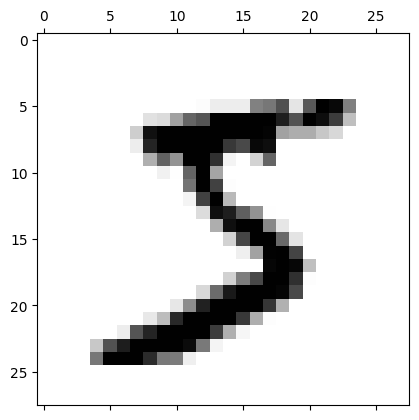

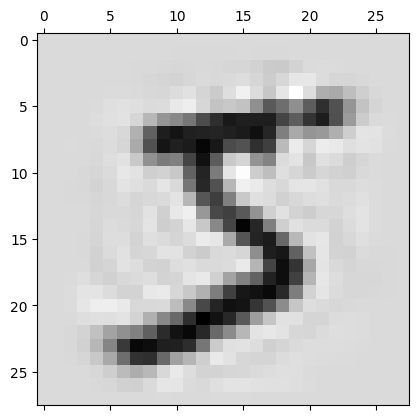

In [28]:
plt.matshow(X_train[0].reshape(28,28),cmap="binary")
plt.matshow(X_recovered[0].reshape(28,28),cmap='binary')

as we can see quality of image is deteriorated

Thus we can say mathematically,
$$
\vec{X}_{recovered} = \vec{X_d}\cdot \vec{W_d}^T
$$

### <div style="font-family:fantasy;">Randomized PCA</div>
This finds a stochastic algorithm that finds an approximation of the first d components.
$TC\rightarrow O(m\times d^2)+O(d^3)$ rather than $TC\rightarrow O(m\times n^2)+O(n^3)$ for full SVD with n dimensions. We can set ```svd_solver="randomized"``` in the PCA function for this. sklearn automatically uses this if (m or n) > 500 and d<80% of (m or n). But in this case as well we can set ```svd_solver="full"``` for non-randomized PCA or full SVD.

### <div style="font-family:fantasy;">Inremental PCA</div>
This is useful for large datasets and applying PCA online. This doesnot require the whole training set to fit in memeory for the algorithm to run. This allows to split dataset into minibatches and feed an IPCA algorithm one mini batch at a time. 

In [36]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

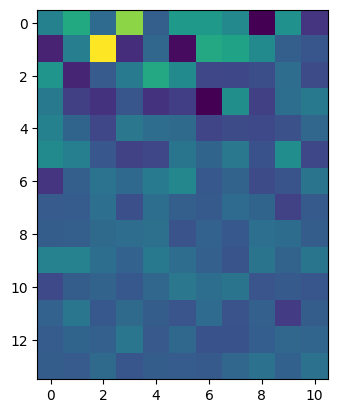

In [37]:
plt.imshow(X_reduced[0].reshape(14,11))

Alternatively we can use the memmap class of numpy which allows memmap class of numpy which allows you to manipulate large array stored in binary file on disk as if it were entirely in the memory. The class loads only the data it needs in the memory when it needs. Since IPCA uses a small part of array at a given time the memory usage remains under control. This makes it possible to call usual fit() method.


In [35]:
X_mm = np.memmap('./datasets/mnist_train.csv',dtype='float32',mode='readonly',shape=(6000,784))
batch_size = 6000//n_batches
inc_pca_2 = IncrementalPCA(n_components=60,batch_size=batch_size)
inc_pca_2.fit(X_mm)



/home/icode100/pyenv/lib/python3.11/site-packages/sklearn/decomposition/_incremental_pca.py:351: RuntimeWarning: overflow encountered in square
  explained_variance = S**2 / (n_total_samples - 1)
/home/icode100/pyenv/lib/python3.11/site-packages/sklearn/decomposition/_incremental_pca.py:352: RuntimeWarning: overflow encountered in square
  explained_variance_ratio = S**2 / np.sum(col_var * n_total_samples)


IncrementalPCA(batch_size=60, n_components=60)

# <div style="font-family:fantasy;">Kernel PCA</div>
Here we use the kernel trick. It helps to perform complex non-linear projections for dimensionality reduction. It is useful for preserving clusters of instances after projection or sometimes even unrolling datasets that lie close to a twisted manifold.

In [79]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll
rbf_pca = KernelPCA(n_components=2,kernel='rbf',gamma=0.04)
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
X_reduced = rbf_pca.fit_transform(X_swiss)

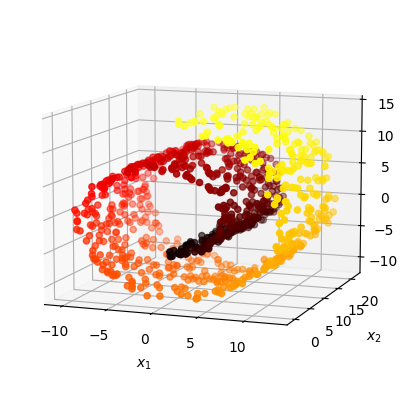

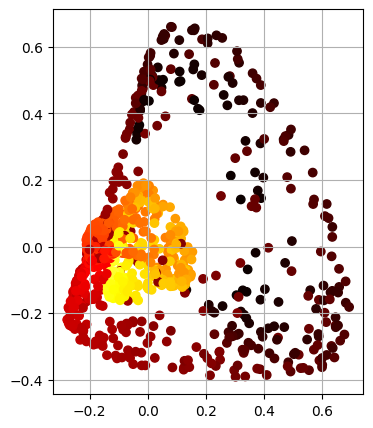

In [80]:
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256))) # type: ignore

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
fig1 = plt.figure(figsize=(4, 5))

ay = fig1.add_subplot(111)
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ay.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
ay.grid()
ax.view_init(10, -70)

set_xyz_axes(ax, axes)
plt.show()

### <div style="font-family:fantasy;">Selecting Kernel and tuning hyperparameter</div>
Dimred is often preparation step for supervised learning task. So you can use grid search to select the kernel and hyperparam that leads to best performance on that task.\
Here's a demo of that 

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [82]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


This transformation via kernel trick is equivalent to using featuremap $\phi$ to map training instances to an infinite dimension feature space then projecting this transformed training set down to 2D using linearPCA.\
Now the reconstruction of reduced space leads to feature space of $\infty$ dim. we cannot exactly locate the position in original space. Thus we cannot compute reconstruction error. Although we approximately find a point in original space that would map closely to reconstructed point. This is called reconstruction preimage. Now based on this we can select the kernel and hyperparameter that minimize the reconstruction error. To perform this reconstruction we can use supervised reegression model with projected instances as training set and original instances as target. In sklearn we can set ```fit_inverse_transform=True```


In [84]:
from sklearn.metrics import mean_squared_error
rbf_pca = KernelPCA(n_components=2,kernel='rbf',gamma=0.04,fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_reduced.shape,X.shape

((1000, 2), (1000, 3))

In [85]:
X_recovered = rbf_pca.inverse_transform(X_reduced)
X_recovered.shape

(1000, 3)

In [86]:
mean_squared_error(X,X_recovered)

31.833632434626296

# <div style="font-family:fantasy;">Locally Linear Embedding</div>
It is a non linear dimred (NDLR) technique. It is a manifold learning technique. It first measures how each training instance linearly relates to its closest neighbours(c.n) then looking for a low dimensional representation of training set where these local relationships are best preserved. This approach makes it particularly good at unrolling twisted manifold especially when there is not too much noise

In [87]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_reduced = lle.fit_transform(X)


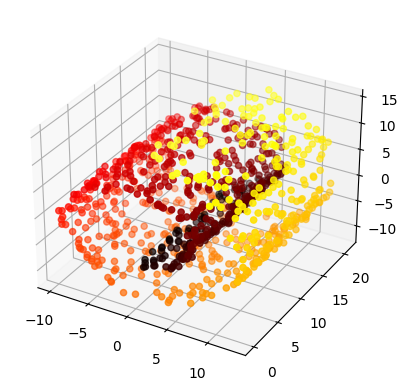

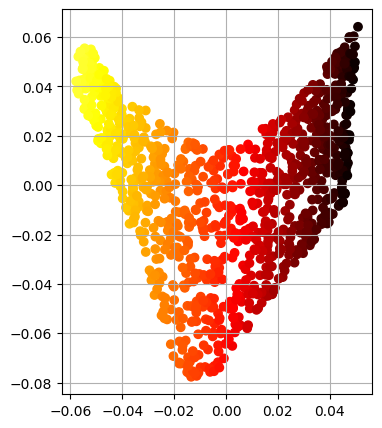

In [103]:
from matplotlib.colors import ListedColormap
fig = plt.figure()
fig1 = plt.figure(figsize=(4, 5))

ay = fig1.add_subplot(111)
ax = fig.add_subplot(111, projection='3d')
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256))) # type: ignore
# Plot the curve
ax.scatter(X[:,0],X[:,1],X[:,2],c=t,cmap=darker_hot)
#plot 2d lle curve
ay.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
ay.grid(True)

### <div style="font-family:fantasy;">Working of LLE</div>
* $i^{th}$ training instance $\vec{x}^{(i)}$ identifies it's k closest neighbours.
* Algo. tries reconstructing $\vec{x}^{(i)}$ as a linear function of these neighbours i.e. it finds $w_{i,j}$ such that squared distance btwn $\vec{x}^{(i)}$ and $\sum_{j=1}^{m}w_{i,j}\vec{x}^{(j)}$ is small assuming that $w_{i,j} = 0$ if $\vec{x}^{(j)}$ is not one of the k nearest neighbours of $\vec{x}^{(i)}$. Thus we get our first constrained optimization problem as 
$$
\hat{W} = ^{argmin}_{\vec{W}} \sum_{i=1}^{m}(\vec{x}^{(i)} - \Sigma_{j=1}^{m}w_{i,j}\vec{x}^{(j)})^2
$$
here $\vec{W}$ is weight matrix containing all weights $w_{i,j}$. subject to the constraints
$$
\begin{equation}
\begin{cases}
w_{i,j}=0, & \text{if} \vec{x}^{(j)} \not \in {{(k\text{ c.n of }\vec{x}^{(i)})}}\\
\sum_{i=1}^{m}w_{i,j}=1, & \text{ for } i=1,2,...m
\end{cases}
\end{equation}
$$
where $\hat{W}$ contains all the weights $w_{i,j}$ encodes local linear reationship btwn training instances.
* Next we map the training instances to d-D space while preserving these local relationship as much as possible.
* If $\hat{z}^{(i)}$ is image of $\hat{x}^{(i)}$ in d-D space then we want the squared distance btwn them to be as small as possible. Note here we are keeing weights fixed that we got from our last step and using them we find the optimal positions. Thus our next unconstrained optimization problem becomes
$$
\hat{Z} = ^{argmin}_{\vec{Z}} \sum_{i=1}^{m}(\vec{z}^{(i)} - \Sigma_{j=1}^{m}w_{i,j}\vec{z}^{(j)})^2
$$
here $\vec{Z}$ is weight matrix containing all images $z_{i,j}$.
where $\hat{Z}$ contains all the images $w_{i,j}$ subject to the optimization
**time complexity**:\
$O(m log(m) n log(k))$ : for finding k nearest neighbours\
$O(mnk^3)$: for optimizing weights\
$O(dm^2)$: for constructing d-D representation where d < n.\
This is due to $m^2$ in the last term that makes it scale poorly for large datasets.


---
---
---